This code implements a local, non-adiabatic kludge prescription of the self-force which is described in detail in Ref. [1]. The main difficulty in implementing this kludge scheme is that the computation of the self-force necessitates taking high-order derivatives (up to the sixth derivative) of various multipole moments. The authors in Ref. [1] tackle this by fitting the multipole moments, which are complicated orbital functionals, to a fourier series expansion in terms of the fundamental frequencies of the motion with respect to Boyer-Lindquist time. See Refs. [1] and [2] for more detail on this approach.

It is mentioned in Ref. [1] that taking these derivatives numerically is a subtle task which requires too much fine-tuning to be feasible for generic inspirals. We encountered similar problems when attempting to take numerical derivatives with finite difference methods in Boyer-Lindquist time. However, in our limited testing thus far, we have found that taking numerical derivatives with respect to Mino time appears to be much more promising than Boyer-Lindquist time.

In this notebook, we provide example code to illustrate how to run an inspiral based on this kludge scheme, plotting throughout various quantities of interest: the trajectory, the evolution of the constants of motion, and the gravitational waveform. The notebook is divided into three sections, each of which computes the high-order derivatives of the multipole moments in different ways. The first section follows the method in Ref. [1] of fitting to a fourier series expansion in Boyer-Lindquist time. The second section performs this fit in Mino time, converting the derivatives of the multipole moments w.r.t Mino time to derivatives w.r.t Boyer-Lindquist time via the chain rule. The final section takes these derivatives numerically in Mino time, again converting back to Boyer-Lindquist time via the chain rule.

The parameters used in this notebook are set in the "params.jl" file.

# Preliminaries

To change the number of threads, run the cell below and then change the notebook's kernel to the newly created one. The page might need to be refreshed before the new kernel comes up as an option 

In [1]:
# using IJulia
# installkernel("Julia 4 threads", env=Dict("JULIA_NUM_THREADS"=>"4"));

In [2]:
Threads.nthreads()

4

The underlying parameters used in this notebook can be changed in the "params.jl" file.

In [3]:
# include("../dependencies.jl");

In [4]:
using DelimitedFiles, LaTeXStrings, Plots.PlotMeasures, Plots

In [5]:
include("params.jl");

# Evolution using fourier fits in Boyer-Lindquist time

### Compute the inspiral using GSL and Julia's base function

This inspiral, and those below, are evolved for a total of ~10,000 seconds, or 2.8 hours.

In [6]:
@time InspiralEvolution.FourierFit.BLTime.compute_inspiral_HJE!(t_max_M, compute_fluxes_BL, t_range_factor_BL, nPointsGeodesic, nPointsFitGSL, MBH_geometric_mass, SCO_geometric_mass,
a, p, e, θmin, gsl_fit, Γαμν, g_μν, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, gTT, gTΦ, gRR, gThTh, gΦΦ, nHarmGSL, kerrReltol, kerrAbstol; data_path=data_path)

240.752883 seconds (123.57 M allocations: 12.610 GiB, 1.63% gc time, 51.01% compilation time: <1% of which was recompilation)


In [7]:
@time InspiralEvolution.FourierFit.BLTime.compute_inspiral_HJE!(t_max_M, compute_fluxes_BL, t_range_factor_BL, nPointsGeodesic, nPointsFitJulia, MBH_geometric_mass, SCO_geometric_mass,
a, p, e, θmin, julia_fit, Γαμν, g_μν, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, gTT, gTΦ, gRR, gThTh, gΦΦ, nHarmJulia, kerrReltol, kerrAbstol; data_path=data_path)

 89.695454 seconds (48.31 M allocations: 26.313 GiB, 3.36% gc time, 1.11% compilation time: 1% of which was recompilation)


### Plot constants of motion

In [8]:
# load trajectory
t_BL_GSL, r_BL_GSL, θ_BL_GSL, ϕ_BL_GSL, dr_dt_BL_GSL, dθ_dt_BL_GSL, dϕ_dt_BL_GSL, d2r_dt2_BL_GSL, d2θ_dt2_BL_GSL, d2ϕ_dt2_BL_GSL, dt_dτ_BL_GSL = 
InspiralEvolution.FourierFit.BLTime.load_trajectory(a, p, e, θmin, q, nHarmGSL, nPointsFitGSL, kerrReltol,
t_range_factor_BL, gsl_fit, data_path);

t_BL_GSL = t_BL_GSL * MtoSecs;

t_Fluxes_BL_GSL, EE_BL_GSL, Edot_BL_GSL, LL_BL_GSL, Ldot_BL_GSL, QQ_BL_GSL, Qdot_BL_GSL, CC_BL_GSL, Cdot_BL_GSL, pArray_BL_GSL, ecc_BL_GSL, θmin_BL_GSL = 
InspiralEvolution.FourierFit.BLTime.load_constants_of_motion(a, p, e, θmin, q, nHarmGSL, nPointsFitGSL, kerrReltol,
t_range_factor_BL, gsl_fit, data_path);

t_Fluxes_BL_GSL = t_Fluxes_BL_GSL * MtoSecs;

ι_BL_GSL = @. acos(LL_BL_GSL / sqrt(LL_BL_GSL^2 + CC_BL_GSL));

In [9]:
# load trajectory
t_BL_Julia, r_BL_Julia, θ_BL_Julia, ϕ_BL_Julia, dr_dt_BL_Julia, dθ_dt_BL_Julia, dϕ_dt_BL_Julia, d2r_dt2_BL_Julia, d2θ_dt2_BL_Julia, d2ϕ_dt2_BL_Julia, dt_dτ_BL_Julia = 
InspiralEvolution.FourierFit.BLTime.load_trajectory(a, p, e, θmin, q, nHarmJulia, nPointsFitJulia, kerrReltol,
t_range_factor_BL, julia_fit, data_path);

t_BL_Julia = t_BL_Julia * MtoSecs;

t_Fluxes_BL_Julia, EE_BL_Julia, Edot_BL_Julia, LL_BL_Julia, Ldot_BL_Julia, QQ_BL_Julia, Qdot_BL_Julia, CC_BL_Julia, Cdot_BL_Julia, pArray_BL_Julia, ecc_BL_Julia, θmin_BL_Julia = 
InspiralEvolution.FourierFit.BLTime.load_constants_of_motion(a, p, e, θmin, q, nHarmJulia, nPointsFitJulia, kerrReltol,
t_range_factor_BL, julia_fit, data_path);

t_Fluxes_BL_Julia = t_Fluxes_BL_Julia * MtoSecs;

ι_BL_Julia = @. acos(LL_BL_Julia / sqrt(LL_BL_Julia^2 + CC_BL_Julia));

In [10]:
# some plot attributes
gsl_col = :red
gsl_ls = :solid
gsl_lw = 2.0

julia_col = :blue
julia_ls = :dash
julia_lw = 2.0
wave_im_ratio = 5   # width / height
wave_height = 300; wave_width = wave_height * wave_im_ratio
xtickfontsize=10; ytickfontsize=10; guidefontsize=15;
# margins
left_margin = 8mm; right_margin=8mm; top_margin=8mm; bottom_margin=8mm;

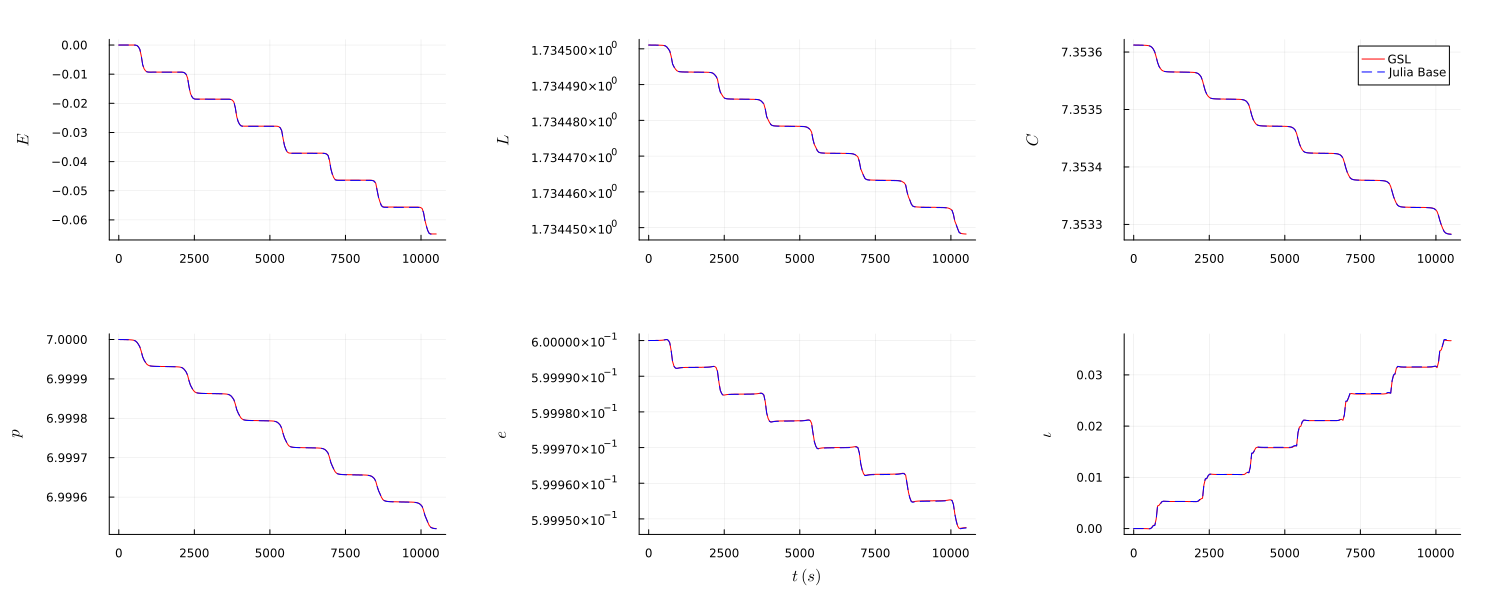

In [11]:
gr()
plotE = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (EE_BL_GSL .- EE_BL_GSL[1]), ylabel=L"E", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotE, t_Fluxes_BL_Julia, 1e4 * (EE_BL_Julia .- EE_BL_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)


plotL = Plots.plot(t_Fluxes_BL_GSL, LL_BL_GSL, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotL, t_Fluxes_BL_Julia, LL_BL_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotC = Plots.plot(t_Fluxes_BL_GSL, CC_BL_GSL, ylabel=L"C", label="GSL",
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotC, t_Fluxes_BL_Julia, CC_BL_Julia, label="Julia Base", color=julia_col, linestyle=julia_ls)

plotP = Plots.plot(t_Fluxes_BL_GSL, pArray_BL_GSL, ylabel=L"p", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotP, t_Fluxes_BL_Julia, pArray_BL_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotEcc = Plots.plot(t_Fluxes_BL_GSL, ecc_BL_GSL, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotEcc, t_Fluxes_BL_Julia, ecc_BL_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotι = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (ι_BL_GSL .- ι_BL_GSL[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotι, t_Fluxes_BL_Julia,1e4 * (ι_BL_Julia .- ι_BL_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]), 
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

### Gravitational waveform

In [12]:
@time h_plus_BL_GSL, h_cross_BL_GSL = InspiralEvolution.FourierFit.BLTime.compute_waveform(obs_distance, Θ, Φ, t_BL_GSL,
a, p, e, θmin, q, nHarmGSL, nPointsFitGSL, kerrReltol, t_range_factor_BL, gsl_fit, data_path);

 16.904725 seconds (554.71 M allocations: 8.844 GiB, 12.32% gc time, 34.19% compilation time: 20% of which was recompilation)


In [13]:
@time h_plus_BL_Julia, h_cross_BL_Julia = InspiralEvolution.FourierFit.BLTime.compute_waveform(obs_distance, Θ, Φ, t_BL_Julia,
a, p, e, θmin, q, nHarmJulia, nPointsFitJulia, kerrReltol, t_range_factor_BL, julia_fit, data_path);

 10.969799 seconds (542.26 M allocations: 8.132 GiB, 16.87% gc time)


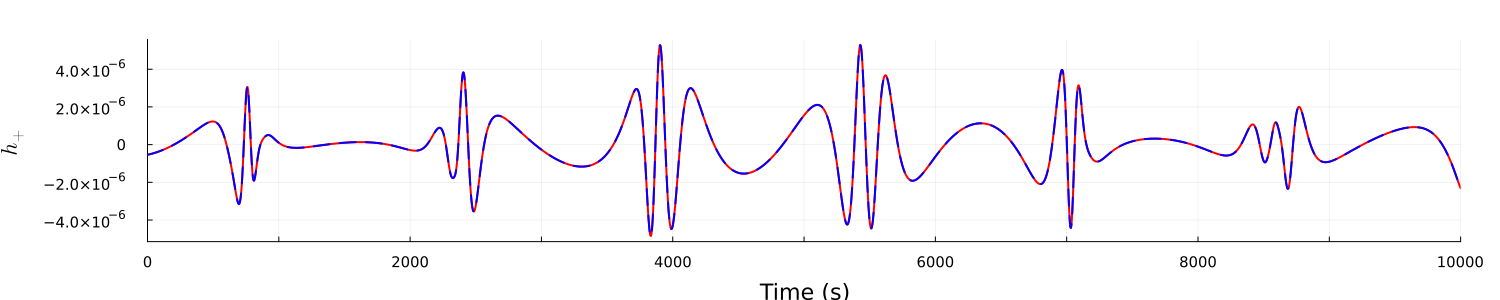

In [14]:
# plot
gr()
p1 = plot(t_BL_GSL, h_plus_BL_GSL, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label = "GSL",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)
plot!(t_BL_Julia, h_plus_BL_Julia, color=julia_col, linestyle=julia_ls, linewidth=julia_lw, label="Julia Base")

display("image/png", p1)

# Evolution using fourier fits in Mino time

Comparing inspiral using GSL and julia's base function

In [15]:
# full fourier fits
use_FDM = true;
@time InspiralEvolution.FourierFit.MinoTime.compute_inspiral_HJE!(t_max_M, compute_fluxes_Mino, t_range_factor_Mino_FF, nPointsFitGSL, MBH_geometric_mass, SCO_geometric_mass,
a, p, e, θmin, gsl_fit, Γαμν, g_μν, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, gTT, gTΦ, gRR, gThTh, gΦΦ, nHarmGSL, !use_FDM, kerrReltol, kerrAbstol; nPointsGeodesic=nPointsGeodesic, data_path=data_path)

120.076379 seconds (74.64 M allocations: 10.508 GiB, 1.97% gc time, 9.10% compilation time)


In [16]:
# use julia fourier fits for fluxes, FDM for waveform
@time InspiralEvolution.FourierFit.MinoTime.compute_inspiral_HJE!(t_max_M, compute_fluxes_Mino, t_range_factor_Mino_FF, nPointsFitJulia, MBH_geometric_mass, SCO_geometric_mass,
a, p, e, θmin, julia_fit, Γαμν, g_μν, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, gTT, gTΦ, gRR, gThTh, gΦΦ, nHarmJulia, use_FDM, kerrReltol, kerrAbstol; h=h, data_path=data_path)

 15.215871 seconds (43.84 M allocations: 4.279 GiB, 4.62% gc time, 9.38% compilation time)


### Plot constants of motion

In [17]:
# load trajectory
λ_Mino_FF_GSL, t_Mino_FF_GSL, r_Mino_FF_GSL, θ_Mino_FF_GSL, ϕ_Mino_FF_GSL, dr_dt_Mino_FF_GSL, dθ_dt_Mino_FF_GSL, dϕ_dt_Mino_FF_GSL,
d2r_dt2_Mino_FF_GSL, d2θ_dt2_Mino_FF_GSL, d2ϕ_dt2_Mino_FF_GSL, dt_dτ_Mino_FF_GSL, dt_dλ_Mino_FF_GSL = 
InspiralEvolution.FourierFit.MinoTime.load_trajectory(a, p, e, θmin, q, nHarmGSL, nPointsFitGSL, kerrReltol,
t_range_factor_Mino_FF, gsl_fit, data_path);

t_Mino_FF_GSL = t_Mino_FF_GSL * MtoSecs;

t_Fluxes_Mino_FF_GSL, EE_Mino_FF_GSL, Edot_Mino_FF_GSL, LL_Mino_FF_GSL, Ldot_Mino_FF_GSL, QQ_Mino_FF_GSL, Qdot_Mino_FF_GSL, CC_Mino_FF_GSL, Cdot_Mino_FF_GSL,
pArray_Mino_FF_GSL, ecc_Mino_FF_GSL, θmin_Mino_FF_GSL = InspiralEvolution.FourierFit.MinoTime.load_constants_of_motion(a, p, e, θmin,
q, nHarmGSL, nPointsFitGSL, kerrReltol, t_range_factor_Mino_FF, gsl_fit, data_path);
t_Fluxes_Mino_FF_GSL = t_Fluxes_Mino_FF_GSL * MtoSecs;

ι_Mino_FF_GSL = @. acos(LL_Mino_FF_GSL / sqrt(LL_Mino_FF_GSL^2 + CC_Mino_FF_GSL));

In [18]:
# load trajectory
λ_Mino_FF_Julia, t_Mino_FF_Julia, r_Mino_FF_Julia, θ_Mino_FF_Julia, ϕ_Mino_FF_Julia, dr_dt_Mino_FF_Julia, dθ_dt_Mino_FF_Julia, dϕ_dt_Mino_FF_Julia,
d2r_dt2_Mino_FF_Julia, d2θ_dt2_Mino_FF_Julia, d2ϕ_dt2_Mino_FF_Julia, dt_dτ_Mino_FF_Julia, dt_dλ_Mino_FF_Julia = 
InspiralEvolution.FourierFit.MinoTime.load_trajectory(a, p, e, θmin, q, nHarmJulia, nPointsFitJulia, kerrReltol,
t_range_factor_Mino_FF, julia_fit, data_path);

t_Mino_FF_Julia = t_Mino_FF_Julia * MtoSecs;

t_Fluxes_Mino_FF_Julia, EE_Mino_FF_Julia, Edot_Mino_FF_Julia, LL_Mino_FF_Julia, Ldot_Mino_FF_Julia, QQ_Mino_FF_Julia, Qdot_Mino_FF_Julia, CC_Mino_FF_Julia, Cdot_Mino_FF_Julia,
pArray_Mino_FF_Julia, ecc_Mino_FF_Julia, θmin_Mino_FF_Julia = InspiralEvolution.FourierFit.MinoTime.load_constants_of_motion(a, p, e, θmin,
q, nHarmJulia, nPointsFitJulia, kerrReltol, t_range_factor_Mino_FF, julia_fit, data_path);
t_Fluxes_Mino_FF_Julia = t_Fluxes_Mino_FF_Julia * MtoSecs;

ι_Mino_FF_Julia = @. acos(LL_Mino_FF_Julia / sqrt(LL_Mino_FF_Julia^2 + CC_Mino_FF_Julia));

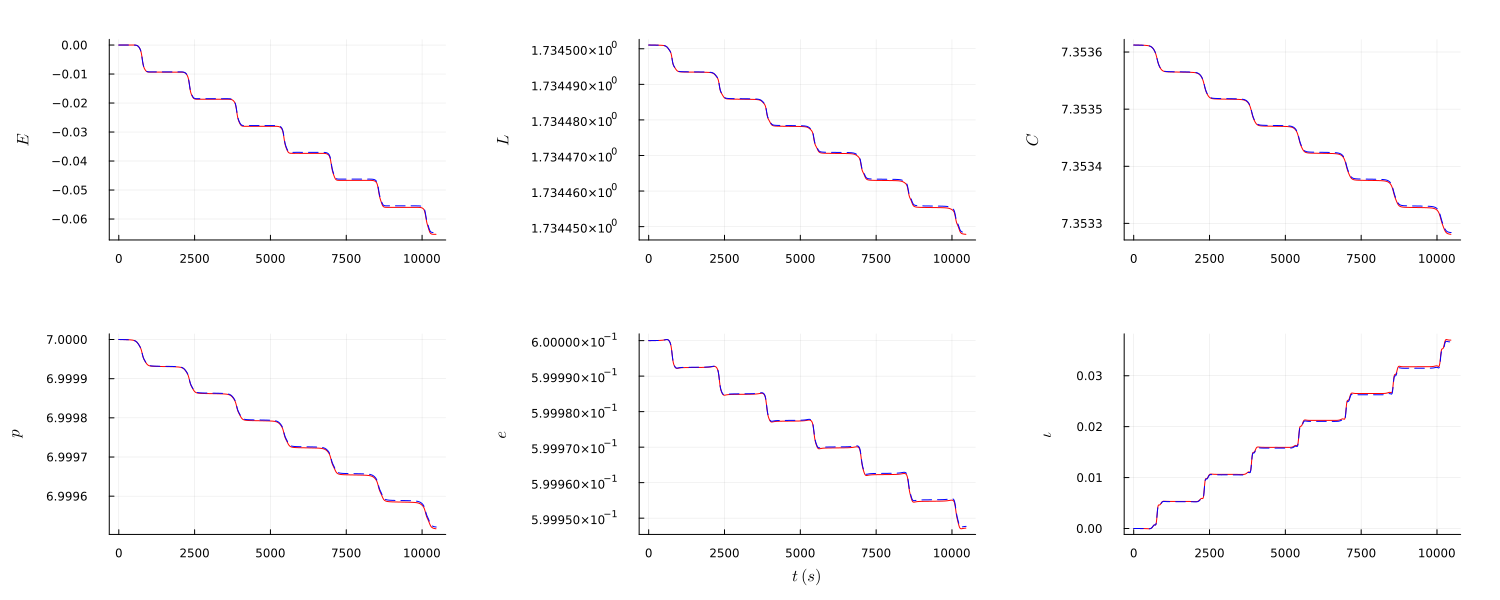

In [19]:
gr()
plotE = Plots.plot(t_Fluxes_Mino_FF_GSL, 1e4 * (EE_Mino_FF_GSL .- EE_Mino_FF_GSL[1]), ylabel=L"E", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotE, t_Fluxes_Mino_FF_Julia, 1e4 * (EE_Mino_FF_Julia .- EE_Mino_FF_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)


plotL = Plots.plot(t_Fluxes_Mino_FF_GSL, LL_Mino_FF_GSL, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotL, t_Fluxes_Mino_FF_Julia, LL_Mino_FF_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotC = Plots.plot(t_Fluxes_Mino_FF_GSL, CC_Mino_FF_GSL, ylabel=L"C", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotC, t_Fluxes_Mino_FF_Julia, CC_Mino_FF_Julia, label="Mino_FF_Julia Fourier Fit", color=julia_col, linestyle=julia_ls)

plotP = Plots.plot(t_Fluxes_Mino_FF_GSL, pArray_Mino_FF_GSL, ylabel=L"p", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotP, t_Fluxes_Mino_FF_Julia, pArray_Mino_FF_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotEcc = Plots.plot(t_Fluxes_Mino_FF_GSL, ecc_Mino_FF_GSL, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotEcc, t_Fluxes_Mino_FF_Julia, ecc_Mino_FF_Julia, legend=:false, color=julia_col, linestyle=julia_ls)
    


plotι = Plots.plot(t_Fluxes_Mino_FF_GSL, 1e4 * (ι_Mino_FF_GSL .- ι_Mino_FF_GSL[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

    Plots.plot!(plotι, t_Fluxes_Mino_FF_Julia,1e4 * (ι_Mino_FF_Julia .- ι_Mino_FF_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]),
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

### Gravitational waveform

In [20]:
@time h_plus_Mino_FF_GSL, h_cross_Mino_FF_GSL = InspiralEvolution.FourierFit.MinoTime.compute_waveform(obs_distance, Θ, 
Φ, t_Mino_FF_GSL, a, p, e, θmin, q, nHarmGSL, nPointsFitGSL, kerrReltol, t_range_factor_Mino_FF, gsl_fit, data_path);

 11.355386 seconds (554.27 M allocations: 8.316 GiB, 18.11% gc time, 0.64% compilation time)


In [21]:
@time h_plus_Mino_FF_Julia, h_cross_Mino_FF_Julia = InspiralEvolution.FourierFit.MinoTime.compute_waveform(obs_distance, Θ, 
Φ, t_Mino_FF_Julia, a, p, e, θmin, q, nHarmJulia, nPointsFitJulia, kerrReltol, t_range_factor_Mino_FF, julia_fit, data_path);

  2.011030 seconds (97.67 M allocations: 1.465 GiB, 16.50% gc time)


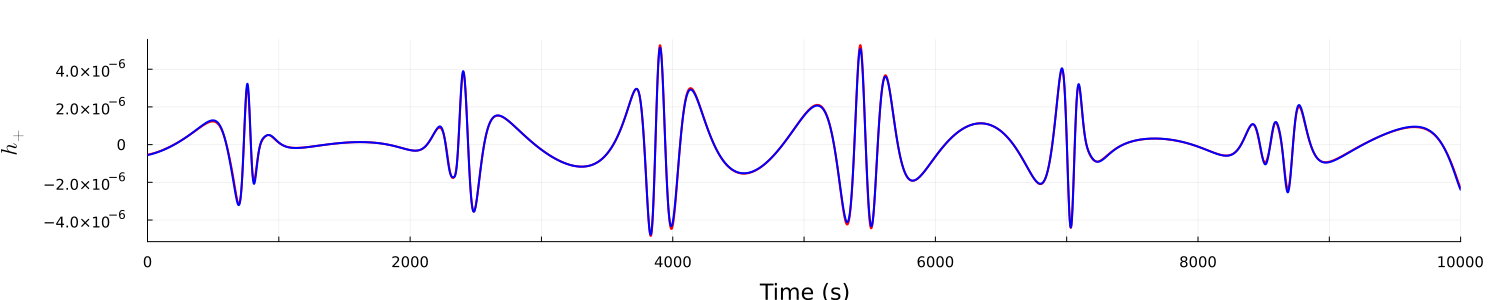

In [22]:
# plot
gr()
p1 = plot(t_Mino_FF_GSL, h_plus_Mino_FF_GSL, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label = "GSL",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)

plot!(t_Mino_FF_Julia, h_plus_Mino_FF_Julia, color=julia_col, linestyle=gsl_ls, linewidth=julia_lw, label="Julia Base")
display("image/png", p1)

# Evolution using finite differences in Mino time

In [23]:
include("compute_Mino_fdm_inspiral.jl")

  8.963687 seconds (44.62 M allocations: 1.285 GiB, 3.70% gc time, 65.04% compilation time)


In [24]:
include("../TestModules/MinoFDMInspiral.jl")
using .MinoFDMInspiral

In [25]:
@time MinoFDMInspiral.compute_inspiral_HJE!(t_max_M, nPointsFDM, MBH_geometric_mass, SCO_geometric_mass, a, p, e, θmin, Γαμν, g_μν, g_tt, g_tϕ, g_rr, g_θθ, g_ϕϕ, gTT, gTΦ, gRR, gThTh, gΦΦ, h, kerrReltol, kerrAbstol; data_path=data_path)

  9.916950 seconds (48.09 M allocations: 2.759 GiB, 5.81% gc time, 36.62% compilation time)


### Plot constants of motion

In [26]:
# load trajectory
λ_Mino_FDM, t_Mino_FDM, r_Mino_FDM, θ_Mino_FDM, ϕ_Mino_FDM, dr_dt_Mino_FDM, dθ_dt_Mino_FDM,
dϕ_dt_Mino_FDM, d2r_dt2_Mino_FDM, d2θ_dt2_Mino_FDM, d2ϕ_dt2_Mino_FDM, dt_dτ_Mino_FDM, dt_dλ_Mino_FDM = 
InspiralEvolution.FiniteDifferences.MinoTime.load_trajectory(a, p, e, θmin, q, h, kerrReltol, data_path);

t_Mino_FDM = t_Mino_FDM * MtoSecs;

t_Fluxes_Mino_FDM, EE_Mino_FDM, Edot_Mino_FDM, LL_Mino_FDM, Ldot_Mino_FDM, QQ_Mino_FDM, Qdot_Mino_FDM, CC_Mino_FDM, Cdot_Mino_FDM,
pArray_Mino_FDM, ecc_Mino_FDM, θmin_Mino_FDM = 
InspiralEvolution.FiniteDifferences.MinoTime.load_constants_of_motion(a, p, e, θmin, q, h, kerrReltol,
data_path);
t_Fluxes_Mino_FDM = t_Fluxes_Mino_FDM * MtoSecs;

ι_Mino_FDM = @. acos(LL_Mino_FDM / sqrt(LL_Mino_FDM^2 + CC_Mino_FDM));

In [27]:
# load trajectory
λ_Mino_FDM_turbo, t_Mino_FDM_turbo, r_Mino_FDM_turbo, θ_Mino_FDFM_turbo, ϕ_Mino_FDFM_turbo, dr_dt_Mino_FDM_turbo, dθ_dt_Mino_FDM_turbo,
dϕ_dt_Mino_FDM_turbo, d2r_dt2_Mino_FDM_turbo, d2θ_dt2_Mino_FDM_turbo, d2ϕ_dt2_Mino_FDM_turbo, dt_dτ_Mino_FDM_turbo, dt_dλ_Mino_FDM_turbo = 
MinoFDMInspiral.load_trajectory(a, p, e, θmin, q, h, kerrReltol, data_path);

t_Mino_FDM_turbo = t_Mino_FDM_turbo * MtoSecs;

t_Fluxes_Mino_FDM_turbo, EE_Mino_FDM_turbo, Edot_Mino_FDM_turbo, LL_Mino_FDM_turbo, Ldot_Mino_FDM_turbo, QQ_Mino_FDM_turbo, Qdot_Mino_FDM_turbo, CC_Mino_FDM_turbo, Cdot_Mino_FDM_turbo,
pArray_Mino_FDM_turbo, ecc_Mino_FDM_turbo, θmin_Mino_FDM_turbo = 
MinoFDMInspiral.load_constants_of_motion(a, p, e, θmin, q, h, kerrReltol,
data_path);
t_Fluxes_Mino_FDM_turbo = t_Fluxes_Mino_FDM_turbo * MtoSecs;

ι_Mino_FDM_turbo = @. acos(LL_Mino_FDM_turbo / sqrt(LL_Mino_FDM_turbo^2 + CC_Mino_FDM_turbo));

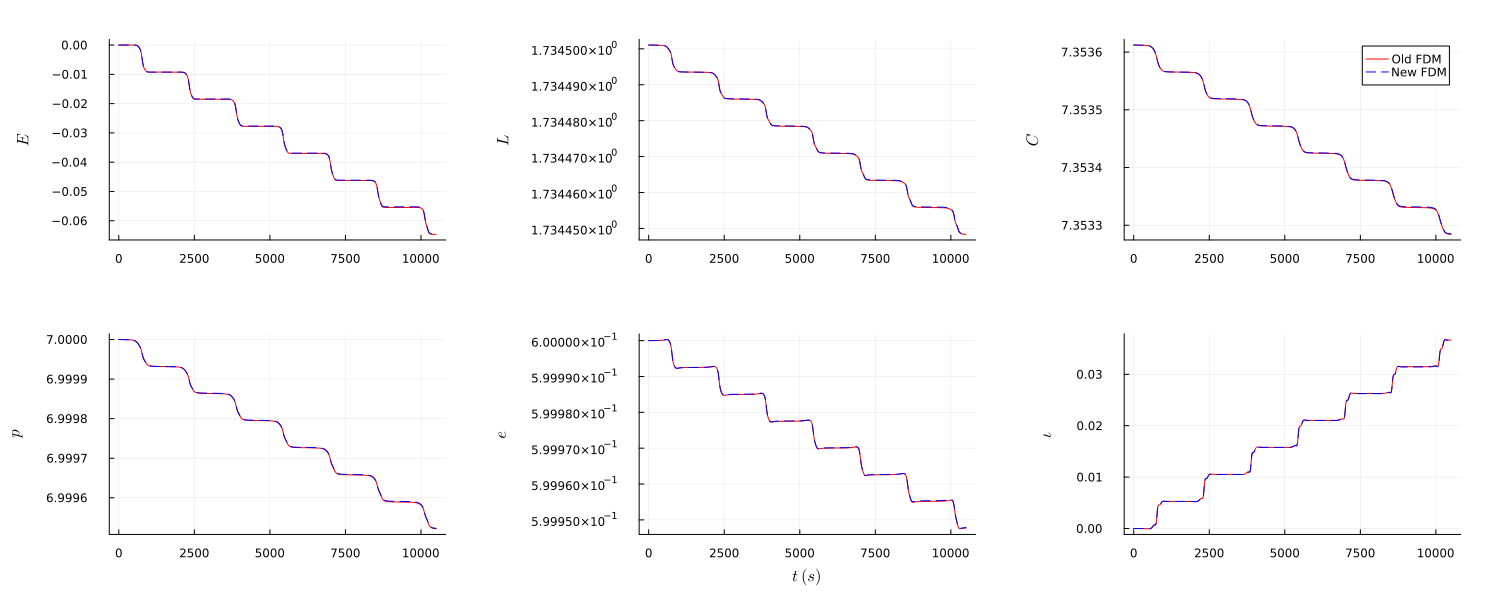

In [28]:

gr()
plotE = Plots.plot(t_Fluxes_Mino_FDM, 1e4 * (EE_Mino_FDM .- EE_Mino_FDM[1]), ylabel=L"E", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotL = Plots.plot(t_Fluxes_Mino_FDM, LL_Mino_FDM, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotC = Plots.plot(t_Fluxes_Mino_FDM, CC_Mino_FDM, ylabel=L"C", legend=:true,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin,
    label="Old FDM")

plotP = Plots.plot(t_Fluxes_Mino_FDM, pArray_Mino_FDM, ylabel=L"p", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotEcc = Plots.plot(t_Fluxes_Mino_FDM, ecc_Mino_FDM, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotι = Plots.plot(t_Fluxes_Mino_FDM, 1e4 * (ι_Mino_FDM .- ι_Mino_FDM[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


Plots.plot!(plotE, t_Fluxes_Mino_FDM_turbo, 1e4 * (EE_Mino_FDM_turbo .- EE_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotL, t_Fluxes_Mino_FDM_turbo, LL_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotC, t_Fluxes_Mino_FDM_turbo, CC_Mino_FDM_turbo, label="New FDM", color=julia_col, linestyle=julia_ls)
Plots.plot!(plotP, t_Fluxes_Mino_FDM_turbo, pArray_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM_turbo, ecc_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotι, t_Fluxes_Mino_FDM_turbo,1e4 * (ι_Mino_FDM_turbo .- ι_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]),
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

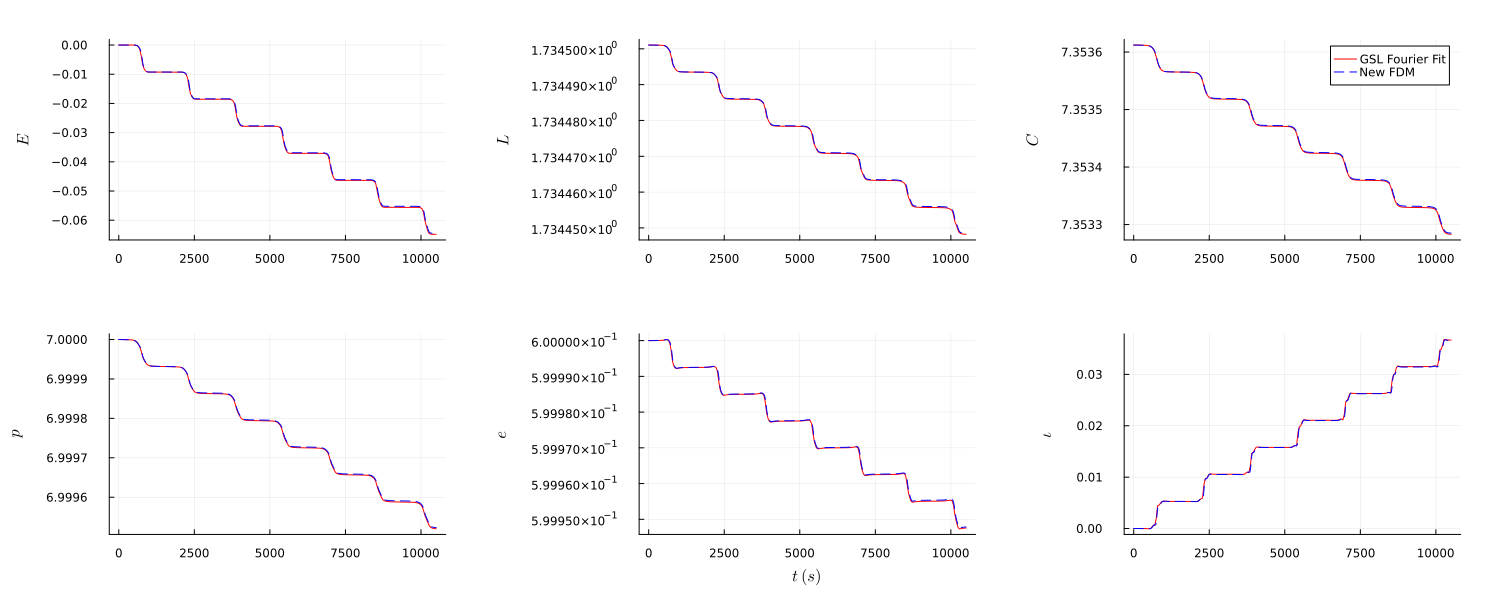

In [29]:
gr()
plotE = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (EE_BL_GSL .- EE_BL_GSL[1]), ylabel=L"E", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotL = Plots.plot(t_Fluxes_BL_GSL, LL_BL_GSL, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotC = Plots.plot(t_Fluxes_BL_GSL, CC_BL_GSL, ylabel=L"C", label="GSL Fourier Fit",
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotP = Plots.plot(t_Fluxes_BL_GSL, pArray_BL_GSL, ylabel=L"p", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotEcc = Plots.plot(t_Fluxes_BL_GSL, ecc_BL_GSL, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotι = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (ι_BL_GSL .- ι_BL_GSL[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
    
Plots.plot!(plotE, t_Fluxes_Mino_FDM_turbo, 1e4 * (EE_Mino_FDM_turbo .- EE_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotL, t_Fluxes_Mino_FDM_turbo, LL_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotC, t_Fluxes_Mino_FDM_turbo, CC_Mino_FDM_turbo, label="New FDM", color=julia_col, linestyle=julia_ls)
Plots.plot!(plotP, t_Fluxes_Mino_FDM_turbo, pArray_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM_turbo, ecc_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotι, t_Fluxes_Mino_FDM_turbo,1e4 * (ι_Mino_FDM_turbo .- ι_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]),
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

### Gravitational waveform

In [30]:
@time h_plus_Mino_FDM, h_cross_Mino_FDM = InspiralEvolution.FiniteDifferences.MinoTime.compute_waveform(
    obs_distance, Θ, Φ, t_Mino_FDM, a, p, e, θmin, q, h, kerrReltol, data_path);

  2.343075 seconds (98.32 M allocations: 1.478 GiB, 18.72% gc time, 3.62% compilation time)


In [31]:
@time t_Waveform_Mino_FDM_turbo, h_plus_Mino_FDM_turbo, h_cross_Mino_FDM_turbo = MinoFDMInspiral.compute_waveform(
    obs_distance, Θ, Φ, a, p, e, θmin, q, h, kerrReltol, data_path);

  2.098693 seconds (98.29 M allocations: 1.477 GiB, 17.62% gc time, 2.63% compilation time)


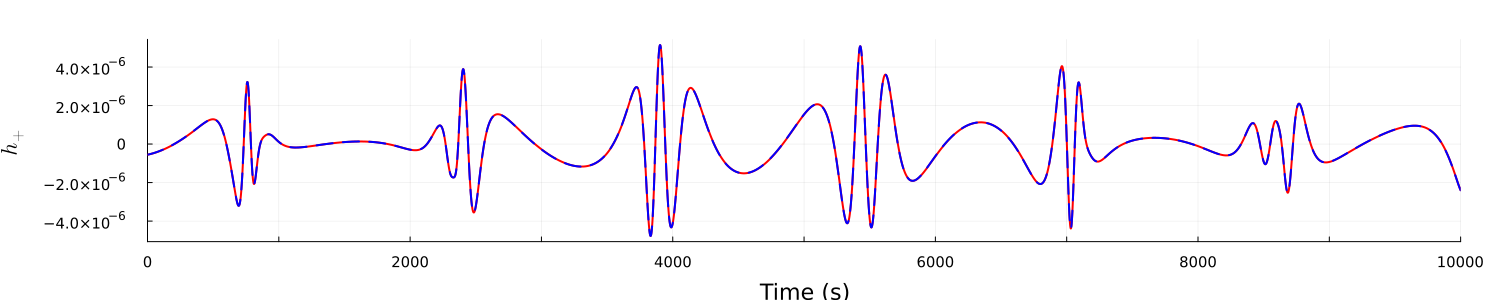

In [32]:
# plot
gr()
p1 = plot(t_Mino_FDM, h_plus_Mino_FDM, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)

plot!(t_Waveform_Mino_FDM_turbo* MtoSecs, h_plus_Mino_FDM_turbo, 
color=julia_col,
linestyle=julia_ls,
linewidth=julia_lw)

display("image/png", p1)

# Combined Plots

In order to compare each of these approaches, we now plot the evolution of the constants of motion and the gravitational waveform for each method altogether.

### Constants of motion

In [33]:
Mino_FF_Julia_col = :blue;
Mino_FF_Julia_ls = :dash;

BL_GSL_col = :red;
BL_GSL_ls = :solid;

Mino_FDM_turbo_col = :green;
Mino_FDM_turbo_ls = :dot;

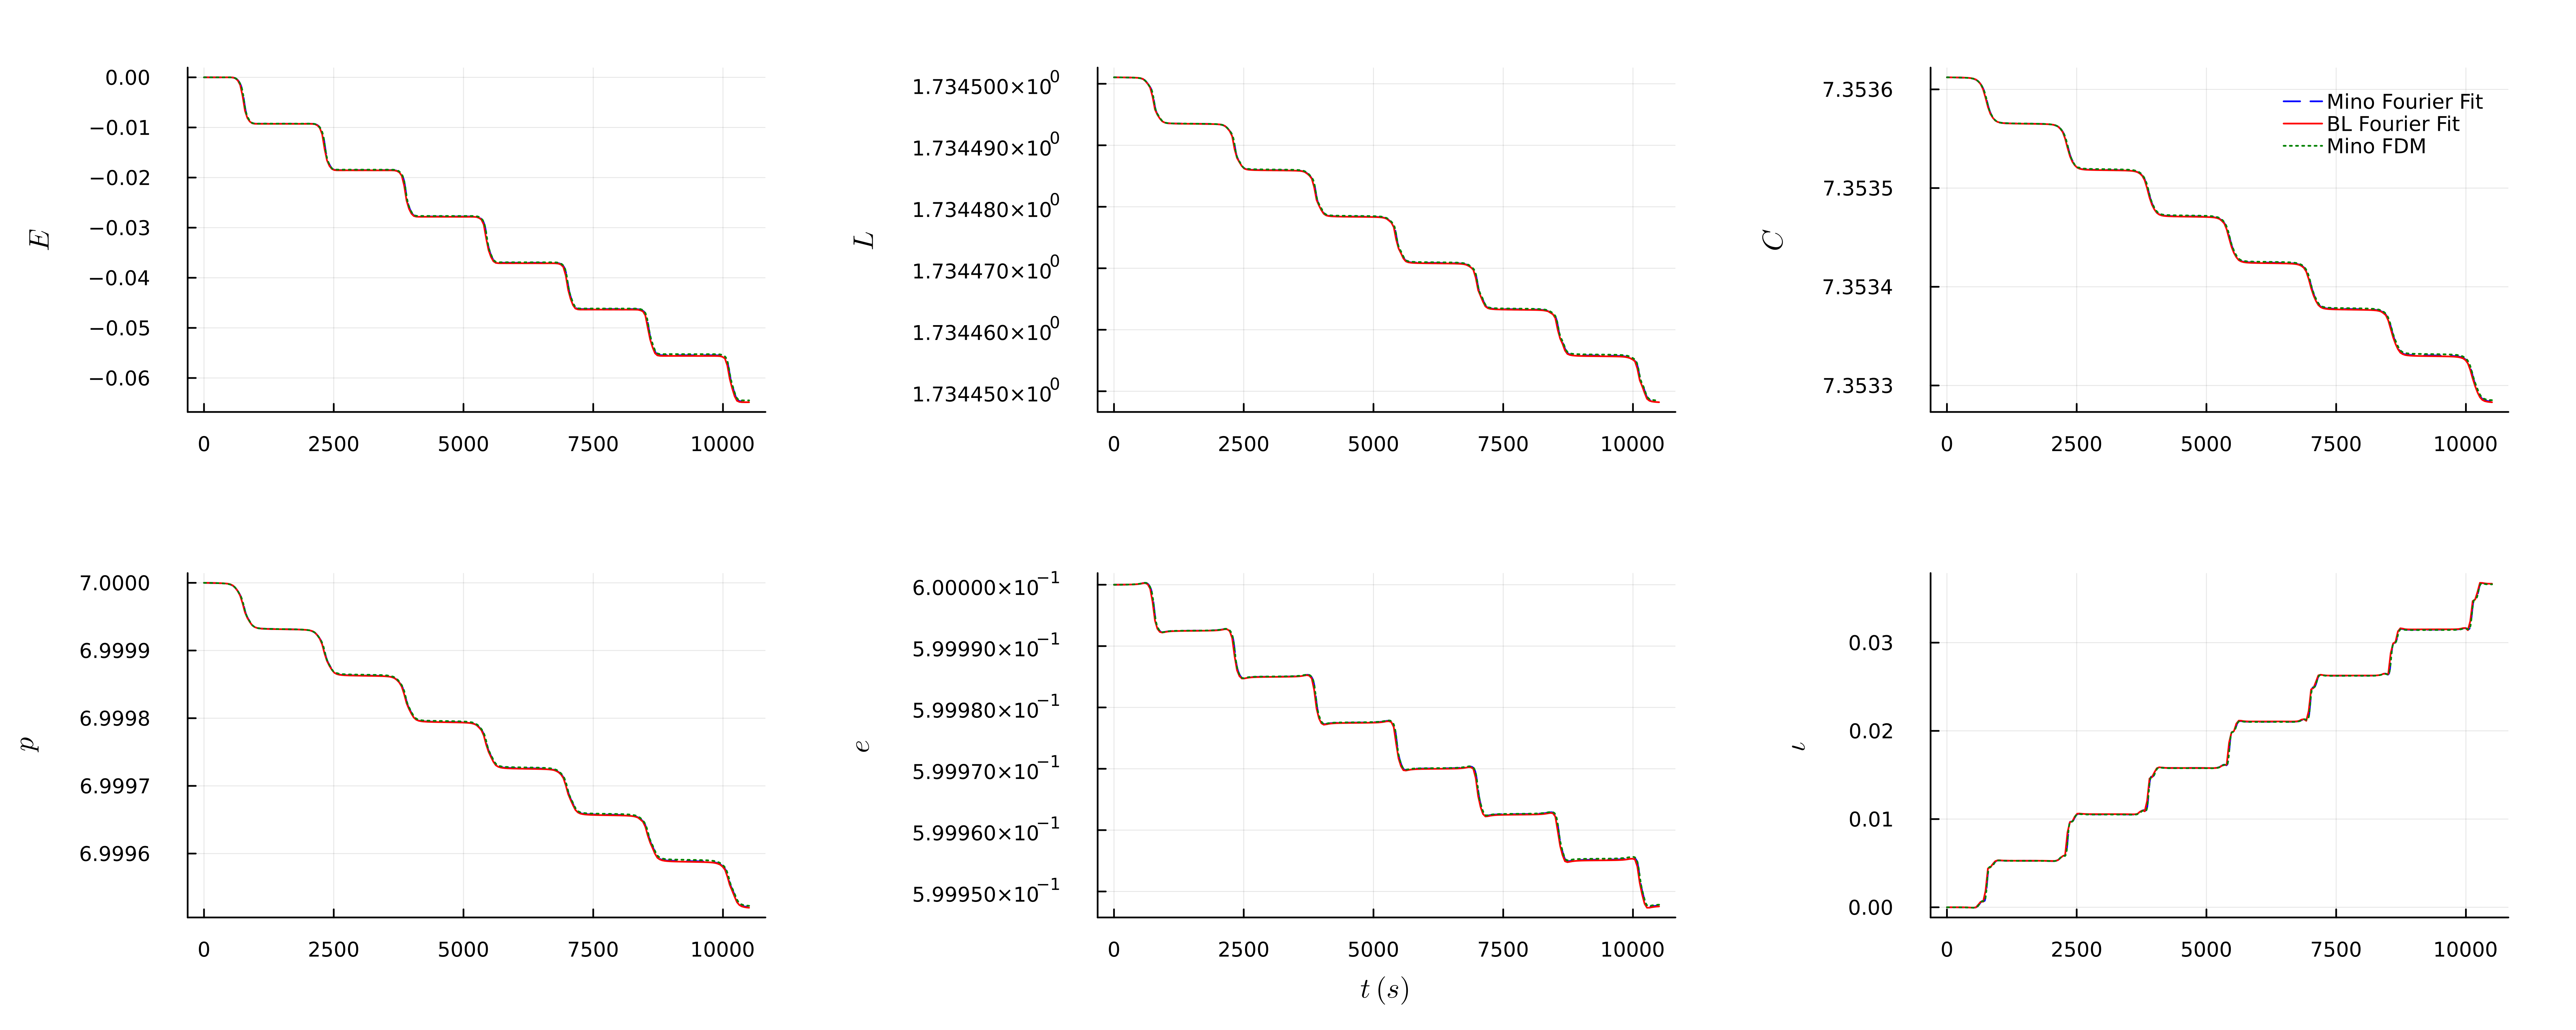

In [34]:
gr()
plotE = Plots.plot(t_Fluxes_Mino_FF_Julia, 1e4 * (EE_Mino_FF_Julia .- EE_Mino_FF_Julia[1]), ylabel=L"E", legend=:false,
    color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotE, t_Fluxes_BL_GSL, 1e4 * (EE_BL_GSL .- EE_BL_GSL[1]), legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotE, t_Fluxes_Mino_FDM_turbo, 1e4 * (EE_Mino_FDM_turbo .- EE_Mino_FDM_turbo[1]), legend=:false, color=Mino_FDM_turbo_col, 
linestyle=Mino_FDM_turbo_ls)

plotL = Plots.plot(t_Fluxes_Mino_FF_Julia, LL_Mino_FF_Julia, ylabel=L"L", legend=:false, color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotL, t_Fluxes_BL_GSL, LL_BL_GSL, legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotL, t_Fluxes_Mino_FDM_turbo, LL_Mino_FDM_turbo, legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)


plotC = Plots.plot(t_Fluxes_Mino_FF_Julia, CC_Mino_FF_Julia, ylabel=L"C", label="Mino Fourier Fit", legend=:topright,
    color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin, foreground_color_legend = nothing, background_color_legend = nothing)
Plots.plot!(plotC, t_Fluxes_BL_GSL, CC_BL_GSL, label="BL Fourier Fit", color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotC, t_Fluxes_Mino_FDM_turbo, CC_Mino_FDM_turbo, label="Mino FDM", color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

plotP = Plots.plot(t_Fluxes_Mino_FF_Julia, pArray_Mino_FF_Julia, ylabel=L"p", legend=:false,  color=Mino_FF_Julia_col,
    linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotP, t_Fluxes_BL_GSL, pArray_BL_GSL, legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotP, t_Fluxes_Mino_FDM_turbo, pArray_Mino_FDM_turbo, legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

plotEcc = Plots.plot(t_Fluxes_Mino_FF_Julia, ecc_Mino_FF_Julia, ylabel=L"e", xlabel=L"t\ (s)", legend=:false, color=Mino_FF_Julia_col,
    linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotEcc, t_Fluxes_BL_GSL, ecc_BL_GSL, legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM_turbo, ecc_Mino_FDM_turbo, legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

plotι = Plots.plot(t_Fluxes_Mino_FF_Julia, 1e4 * (ι_Mino_FF_Julia .- ι_Mino_FF_Julia[1]), ylabel=L"\iota", legend=:false,
    color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotι, t_Fluxes_BL_GSL,1e4 * (ι_BL_GSL .- ι_BL_GSL[1]), legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotι, t_Fluxes_Mino_FDM_turbo,1e4 * (ι_Mino_FDM_turbo .- ι_Mino_FDM_turbo[1]), legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]), size=(1500, 600), dpi=500)
display("image/png", orbitalParamsPlot)

### Waveform

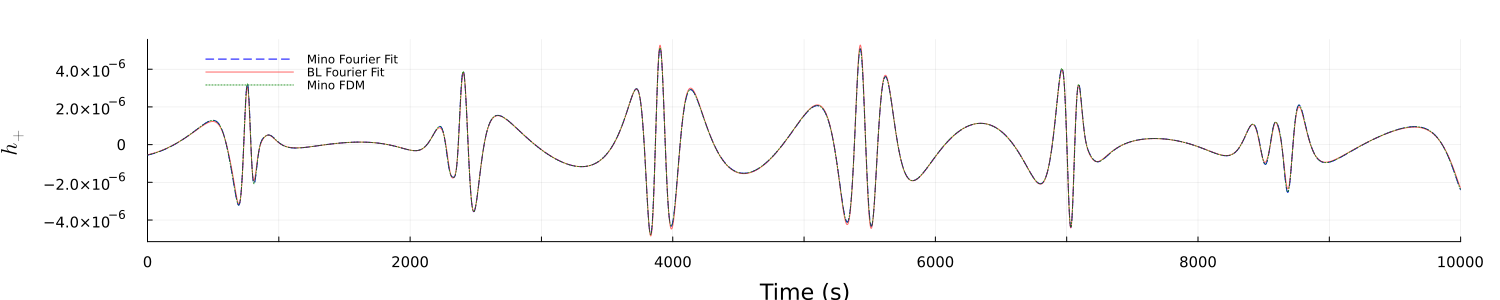

In [35]:
# plot
gr()
p1 = plot(t_Mino_FF_Julia, h_plus_Mino_FF_Julia, 
color=Mino_FF_Julia_col,
linestyle=Mino_FF_Julia_ls,
xlims=(0, 10000),
legend =:topleft,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label="Mino Fourier Fit",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)


plot!(t_BL_GSL, h_plus_BL_GSL, 
color=BL_GSL_col,
linestyle=BL_GSL_ls,
label="BL Fourier Fit", alpha=0.6)

plot!(t_Mino_FDM_turbo, h_plus_Mino_FDM_turbo, 
color=Mino_FDM_turbo_col,
linestyle=Mino_FDM_turbo_ls,
label="Mino FDM", alpha=0.8)
display("image/png", p1)

## References

[1] Sopuerta, C., & Yunes, N. New Kludge Scheme for the Construction of Approximate Waveforms for Extreme-Mass-Ratio Inspirals. [arXiv:1109.0572](https://arxiv.org/abs/1109.0572)

[2] S. Drasco and S. A. Hughes. Rotating black hole orbit functionals in the frequency domain. [arXiv:astro-ph/0308479v3](https://arxiv.org/abs/astro-ph/0308479v3)